In [105]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Predicting future sales (SALE_QTY - Quantity of product sold)
forecast the daily sales for each product and each shop in September 2019

In [45]:
data = pd.read_csv('sales_data_for_test.csv', index_col=0)
data = data.sort_values(by='INVDT', ascending=True)
data = data.set_index('INVDT')
data

,WEEK,YEAR,MCAT,SUBCAT,SALE_QTY,MRP_VALUE,NETSALE_VALUE,TAX_VALUE,PRODUCT,SHOP
INVDT,,,,,,,,,,
2019-01-01,1,2019,70,53,65,195.00,195.00,29.90,147,8
2019-01-01,1,2019,50,52,1,1099.00,1099.00,167.64,137,97
2019-01-01,1,2019,50,52,1,1099.00,1099.00,167.64,140,175
2019-01-01,1,2019,50,11,2,178.00,178.00,27.16,91,10
2019-01-01,1,2019,35,14,1,299.00,299.00,14.24,22,220
2019-01-01,1,2019,50,11,1,79.00,79.00,12.06,89,40
2019-01-01,1,2019,35,6,2,498.00,498.00,23.72,35,156
2019-01-01,1,2019,35,14,2,598.00,598.00,28.48,22,0
2019-01-01,1,2019,31,20,1,399.00,399.00,19.00,31,202


# 1. Exploratory Data Analysis

In [18]:
data_group= data.groupby(['WEEK', 'PRODUCT', 'SHOP']).count()
data_group

YEAR  INVDT  MCAT  SUBCAT  SALE_QTY  MRP_VALUE  \
WEEK PRODUCT SHOP                                                   
1    0       54       1      1     1       1         1          1   
             70       1      1     1       1         1          1   
             193      1      1     1       1         1          1   
             205      1      1     1       1         1          1   
             228      1      1     1       1         1          1   
             346      1      1     1       1         1          1   
     1       54       1      1     1       1         1          1   
             99       1      1     1       1         1          1   
             119      1      1     1       1         1          1   
             256      1      1     1       1         1          1   
             258      1      1     1       1         1          1   
             283      1      1     1       1         1          1   
             322      1      1     1       1         1          1   
     3       18       1      1     1       1         1          1   
             54       1      1     1       1         1          1   
             61       1      1     1       1         1          1   
             73       1      1     1       1         1          1   
             117      1      1     1       1         1          1   
             119      1      1     1       1         1          1   
             178      1      1     1       1         1          1   
             180      1      1     1       1         1          1   
             192      1      1     1       1         1          1   
             258      1      1     1       1         1          1   
     4       7        1      1     1       1         1          1   
             9        1      1     1       1         1          1   
             18       1      1     1       1         1          1   
             35       1      1     1       1         1          1   
             51       1      1     1       1         1          1   
             76       1      1     1       1         1          1   
             192      1      1     1       1         1          1   
...                 ...    ...   ...     ...       ...        ...   
39   150     224      7      7     7       7         7          7   
             237      6      6     6       6         6          6   
             251      7      7     7       7         7          7   
             259      7      7     7       7         7          7   
             261      7      7     7       7         7          7   
             267      6      6     6       6         6          6   
             269      7      7     7       7         7          7   
             270      7      7     7       7         7          7   
             274      7      7     7       7         7          7   
             278      7      7     7       7         7          7   
             280      7      7     7       7         7          7   
             284      7      7     7       7         7          7   
             287      3      3     3       3         3          3   
             290      6      6     6       6         6          6   
             298      7      7     7       7         7          7   
             300      7      7     7       7         7          7   
             311      5      5     5       5         5          5   
             329      2      2     2       2         2          2   
             330      7      7     7       7         7          7   
             336      5      5     5       5         5          5   
     151     172      7      7     7       7         7          7   
             235      7      7     7       7         7          7   
             288      3      3     3       3         3          3   
     152     69       4      4     4       4         4          4   
             172      5      5     5       5         5          5   
             235 

In [46]:
data[(data['WEEK']==39) & (data['PRODUCT']==150) & (data['SHOP']==224)]

,WEEK,YEAR,MCAT,SUBCAT,SALE_QTY,MRP_VALUE,NETSALE_VALUE,TAX_VALUE,PRODUCT,SHOP
INVDT,,,,,,,,,,
2019-09-16,39,2019,70,53,13,65.0,0.0,0.0,150,224
2019-09-17,39,2019,70,53,14,70.0,0.0,0.0,150,224
2019-09-18,39,2019,70,53,6,30.0,0.0,0.0,150,224
2019-09-19,39,2019,70,53,8,40.0,0.0,0.0,150,224
2019-09-20,39,2019,70,53,4,20.0,0.0,0.0,150,224
2019-09-21,39,2019,70,53,4,20.0,0.0,0.0,150,224
2019-09-22,39,2019,70,53,16,80.0,0.0,0.0,150,224


What variable may affect SALE_QTY?
1. WEEK 
2. MCAT
3. MRP_VALUE
4. NETSALE_VALUE
5. TAX_VALUE
6. SHOP

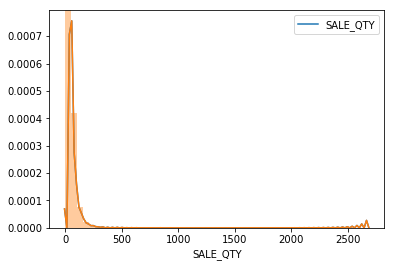

In [3]:
sns.kdeplot(data.SALE_QTY)
sns.distplot(data.SALE_QTY)

It gave a shape of the sales quantity data overall.

## 1.1 Visualize the relation between time and sale_qty

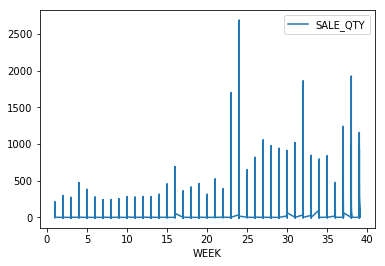

In [4]:
ax = plt.gca()
data.plot(kind='line', x='WEEK', y='SALE_QTY', ax=ax)
plt.show()

## 1.2 Visualize the relation between product itself and sale_qty

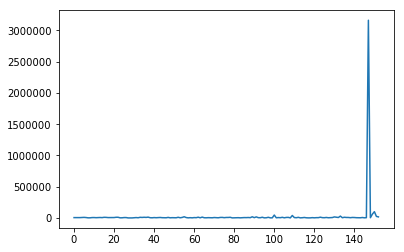

In [9]:
product_data = data.groupby('PRODUCT').sum()
plt.figure()
plt.plot(product_data.index.values, product_data['SALE_QTY'])
plt.show()

In [10]:
product_data

,WEEK,YEAR,MCAT,SUBCAT,SALE_QTY,MRP_VALUE,NETSALE_VALUE,TAX_VALUE,SHOP
PRODUCT,,,,,,,,,
0,88441,9378255,143995,46450,5238,1828062.0,1812494.54,86314.50,681586
1,82274,8649396,132804,42840,4836,1687764.0,1672492.51,79647.16,608198
2,68985,6252843,96007,9291,3709,2592591.0,2566556.96,122196.58,502542
3,90240,9356046,143654,46340,5242,2091558.0,2075190.31,98818.66,665934
4,125407,12752004,195796,63160,7676,3062724.0,3035664.02,144555.50,887117
5,139656,14286444,219356,70760,8840,3527160.0,3497417.05,166543.90,1015753
6,104059,10821840,166160,53600,6341,2530059.0,2506240.28,119344.96,767093
7,19620,2562111,39339,6345,1663,1661337.0,1466311.77,69826.60,166250
8,25849,3139545,48205,7775,1970,1968030.0,1731340.69,82447.38,213558


## 1.3 Visualize the relation between shop and sale_qty

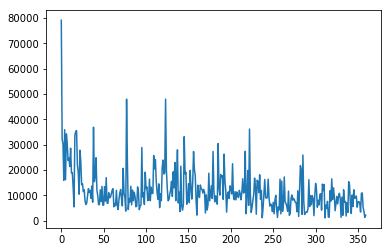

In [11]:
shop_data = data.groupby('SHOP').sum()
plt.figure()
plt.plot(shop_data.index.values, shop_data['SALE_QTY'])
plt.show()

# 2. Data cleaning

## 2.1 Find Outlier

MRP_VALUE, NETSALE_VALUE, TAX_VALUE can‘t be 0.
Remove the samples with any of MRP_VALUE, NETSALE_VALUE, TAX_VALUE is negative

In [25]:
data[(data['MRP_VALUE']==0) | (data['NETSALE_VALUE']==0)]

,WEEK,YEAR,INVDT,MCAT,SUBCAT,SALE_QTY,MRP_VALUE,NETSALE_VALUE,TAX_VALUE,PRODUCT,SHOP
636740,1,2019,2019-01-01,35,15,0,0.0,0.0,0.0,15,268
469739,1,2019,2019-01-01,34,1,0,0.0,0.0,0.0,44,192
566065,2,2019,2019-01-02,51,51,0,0.0,0.0,0.0,87,306
655123,2,2019,2019-01-02,35,15,0,0.0,0.0,0.0,26,44
37817,2,2019,2019-01-02,1,5,0,0.0,0.0,0.0,33,89
245462,2,2019,2019-01-02,50,11,0,0.0,0.0,0.0,91,127
719877,2,2019,2019-01-02,50,23,0,0.0,0.0,0.0,101,20
469356,2,2019,2019-01-03,5,50,0,0.0,0.0,0.0,32,26
531140,2,2019,2019-01-04,50,11,0,0.0,0.0,0.0,91,253
717945,2,2019,2019-01-04,7,1,0,0.0,0.0,0.0,36,343


Find the sale_qty which is far more away from the normal

In [53]:
filtered_data = data[(data.MRP_VALUE >= 0) & (data.NETSALE_VALUE >= 0) & (data.TAX_VALUE >= 0) & (data.SALE_QTY < 500)]
filtered_data

,WEEK,YEAR,MCAT,SUBCAT,SALE_QTY,MRP_VALUE,NETSALE_VALUE,TAX_VALUE,PRODUCT,SHOP
INVDT,,,,,,,,,,
2019-01-01,1,2019,70,53,65,195.00,195.00,29.90,147,8
2019-01-01,1,2019,50,52,1,1099.00,1099.00,167.64,137,97
2019-01-01,1,2019,50,52,1,1099.00,1099.00,167.64,140,175
2019-01-01,1,2019,50,11,2,178.00,178.00,27.16,91,10
2019-01-01,1,2019,35,14,1,299.00,299.00,14.24,22,220
2019-01-01,1,2019,50,11,1,79.00,79.00,12.06,89,40
2019-01-01,1,2019,35,6,2,498.00,498.00,23.72,35,156
2019-01-01,1,2019,35,14,2,598.00,598.00,28.48,22,0
2019-01-01,1,2019,31,20,1,399.00,399.00,19.00,31,202


## 2.2 Take care of Missing Data

In [54]:
filtered_data.isnull().values.any()

False

In [55]:
filtered_data.isna().values.any()

False

# 3. Feature engineering (describe the rationale) 

## 3.1 Splitting the dataset into Training and Test set

In [101]:
training_set = filtered_data[filtered_data.index < '2019-09-01']
test_set = filtered_data[filtered_data.index >= '2019-09-01']
print(training_set.shape, test_set.shape)

(683286, 10) (56130, 10)


## 3.2 Feature Scaling

In [98]:
# normalize features
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)
training_set_scaled

array([[0.        , 0.        , 1.        , ..., 0.00656083, 0.96710526,
        0.02228412],
       [0.        , 0.        , 0.71014493, ..., 0.03678453, 0.90131579,
        0.27019499],
       [0.        , 0.        , 0.71014493, ..., 0.03678453, 0.92105263,
        0.48746518],
       ...,
       [1.        , 0.        , 0.47826087, ..., 0.00218987, 0.09210526,
        0.52089136],
       [1.        , 0.        , 0.71014493, ..., 0.00331333, 0.73026316,
        0.82729805],
       [1.        , 0.        , 0.71014493, ..., 0.00692508, 0.70394737,
        0.46796657]])

## 3.3 Split features and label

In [99]:
training_set_scaled_X = training_set_scaled[:,[2,3,5,6,7,8,9]]
training_set_scaled_y = training_set_scaled[:,[4]]
test_set_scaled_X = test_set_scaled[:,[2,3,5,6,7,8,9]]
test_set_scaled_y = test_set_scaled[:,[4]]

## 3.3 Create a data structure with 60 timesteps and 1 output

In [102]:
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(60, 683286):
    # use previous 60 samples at time(59) to predict the sale_qty at time(60)
    X_train.append(training_set_scaled_X[i-60:i]) 
    y_train.append(training_set_scaled_y[i])
    
for i in range(60, 56130):
    X_test.append(test_set_scaled_X[i-60:i])
    y_test.append(test_set_scaled_y[i])
    
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(683226, 60, 7) (683226, 1) (56070, 60, 7) (56070, 1)


# 4. Forecast modeling (describe the modeling)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 7)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1)) #output layer

#compile
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#fitting the rnn with training set
regressor.fit(X_train, y_train, epochs = 100)

Epoch 1/100
101824/683226 [===>..........................] - ETA: 1:28:12 - loss: 0.0012

# 5. Evaluate the models using metrics such as MAPE, wMAPE, RMSE or any other metrics that you deem suitable. This should be done at various time and product hierarchy. 


Parameters to adjust:
timesteps, optimizer, layer, dropout